<a href="https://colab.research.google.com/github/AnVo01/AI-Final-Project/blob/main/Artical_Classification_Dict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import pandas as pd
import re
import os
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
dir = '/content/drive/MyDrive/Text_classification/Code_Built_Model/Viet74K.txt'
file = open(dir,'r',encoding='utf-8')
viet_dict = dict()

for word in file:
  word = re.sub(r'[\n]', '', word)
  if word not in viet_dict:
    viet_dict[word] = len(viet_dict)

In [ ]:
def tachtu(text, dict):
  input = text.split(" ")
  words = []
  start = 0
  while True:
    end = len(input)
    while end > start: #e>s khi còn từ
      sentence = input[start:end]
      sentence = " ".join(sentence)
      end = end-1 
      if sentence.lower() in viet_dict:
        words.append(sentence)
        break
    start = end + 1  
    if start == len(input):
      break
  output = []
  for word in words:
    word = re.sub(r'[ ]', '_', word)
    output.append(word)
  output = " ".join(output)
  return output

special_character = ['0','1','2','3','4','5','6','7','8','9','!','@','#','$','%','^','&','*','(',')','-','=','+','\n','\t',':',';',',','.','|','"','/','\'']
def xoa_kyhieu(s):
  b = []
  for word in s.split():
    a = []
    for letter in word:
      if letter not in special_character:
        a.append(letter)
    mystring = "".join([str(char) for char in a])
    if mystring != "":
      b.append(mystring)
  mystringfinal = " ".join([str(char) for char in b])
  return mystringfinal

stopword = ['a_lô']
def create_stopword(path):
  with open(path, encoding="utf-8") as words:
    return [w[:len(w) - 1] for w in words] + stopword

stop_words = create_stopword('/content/drive/MyDrive/Text_classification/Code_Built_Model/stop_word.txt')

def xoa_dau(s):
    s = re.sub(r'[àáạảãâầấậẩẫăằắặẳẵ]', 'a', s)
    s = re.sub(r'[ÀÁẠẢÃĂẰẮẶẲẴÂẦẤẬẨẪ]', 'A', s)
    s = re.sub(r'[èéẹẻẽêềếệểễ]', 'e', s)
    s = re.sub(r'[ÈÉẸẺẼÊỀẾỆỂỄ]', 'E', s)
    s = re.sub(r'[òóọỏõôồốộổỗơờớợởỡ]', 'o', s)
    s = re.sub(r'[ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠ]', 'O', s)
    s = re.sub(r'[ìíịỉĩ]', 'i', s)
    s = re.sub(r'[ÌÍỊỈĨ]', 'I', s)
    s = re.sub(r'[ùúụủũưừứựửữ]', 'u', s)
    s = re.sub(r'[ƯỪỨỰỬỮÙÚỤỦŨ]', 'U', s)
    s = re.sub(r'[ỳýỵỷỹ]', 'y', s)
    s = re.sub(r'[ỲÝỴỶỸ]', 'Y', s)
    s = re.sub(r'[Đ]', 'D', s)
    s = re.sub(r'[đ]', 'd', s)
    return s

def xuly(s):
  s = xoa_kyhieu(s)
  s = tachtu(s,viet_dict)
  s = [word for word in s.lower().split() if word not in stop_words]
  s = " ".join(s)
  s = xoa_dau(s)
  return s

In [ ]:
s = "TP HCM: Phố @cà phê% Tân 100% Bình 'nóng' ^theo^ từng đường bóng đá"
print(xoa_kyhieu(s))

TP HCM Phố cà phê Tân Bình nóng theo từng đường bóng đá


In [ ]:
s = "TP HCM Phố cà phê Tân Bình nóng theo từng đường bóng đá"
print(tachtu(s,viet_dict))

Phố cà_phê Tân Bình nóng theo từng đường bóng_đá


In [ ]:
s = "TP HCM Phố cà_phê Tân_Bình nóng theo từng đường bóng_đá"
print(xoa_dau(s))

TP HCM Pho ca_phe Tan_Binh nong theo tung duong bong_da


In [ ]:
s = "TP HCM Pho ca_phe Tan_Binh nong theo tung duong bong_da"
print([word for word in s.lower().split() if word not in stop_words])

['tp', 'hcm', 'ca_phe', 'tan_binh', 'nong', 'tung', 'duong', 'bong_da']


In [ ]:
s = "TP HCM: Phố @cà phê% Tân 100% Bình 'nóng' ^theo^ từng đường bóng đá"
print(xuly(s))

pho ca_phe tan binh nong duong bong_da h


In [ ]:
data = pd.DataFrame({'content':[],'class': []})
dir = '/content/drive/MyDrive/Text_classification/Code_Built_Model/dataset'
for i in os.listdir(dir):
  for j in os.listdir(dir+ '/' +i):
    file = open(dir+ '/' + i + '/' + j,'r',encoding='utf-16')
    for k in range(2):
      d1 = file.readline()
      d2 = file.readline()
      d = xuly(d1+d2)
      if d != "":
        data = data.append({'content': d,'class':i},ignore_index=True)

In [ ]:
data

,content,class
0,phong_van du_hoc nhat truong nhat ngu to_chuc ...,Chinh_tri_Xa_hoi
1,phong_van h van_phong cong_ty giao_duc dao_tao...,Chinh_tri_Xa_hoi
2,hoc_bong my cong_ty duc hoc_bong nam_hoc nganh...,Chinh_tri_Xa_hoi
3,du_hoc mien dich_vu phi phi thu moi hoc visa t...,Chinh_tri_Xa_hoi
4,hoi_thao du_hoc ron giam_doc marketing gioi_th...,Chinh_tri_Xa_hoi
...,...,...
83792,van_ban thuc_thi thua thao thong_bao gui nghe_...,Van_hoa
83793,nhac_si duong thu ban doi_song am_nhac my linh...,Van_hoa
83794,mua hong_nhung dau_hieu chung hat nghe_thuat t...,Van_hoa
83795,mua len trau cong_chieu my phim mua len trau h...,Van_hoa


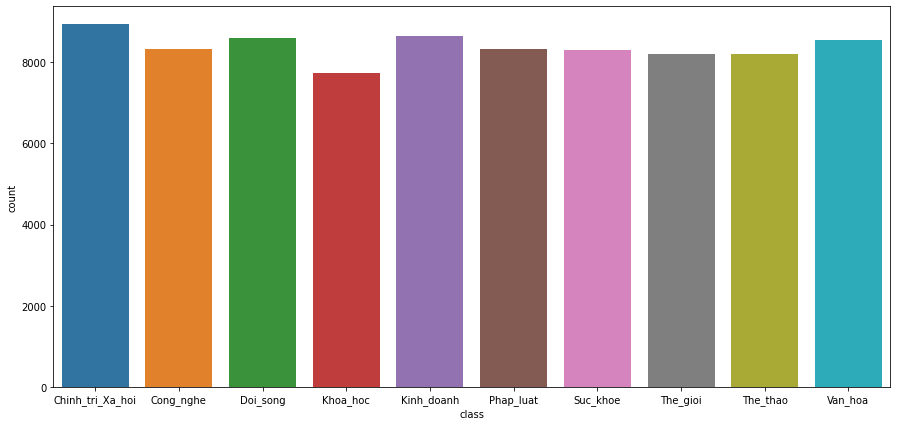

In [ ]:
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Text_classification/Code_Built_Model/artical_classification.csv')
plt.subplots(figsize = (15,7))
sns.countplot(x=data['class'])

In [ ]:
data.to_csv('/content/drive/MyDrive/Text_classification/Code_Built_Model/artical_classification.csv',encoding='utf-8')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Text_classification/Code_Built_Model/artical_classification.csv')
print(data.shape)
cs = data['content'].values.tolist()

(83797, 3)


In [ ]:
word_dict = dict()
max_num = 0

for sentence in cs:
  for word in (sentence.lower()).split():
    if word not in word_dict:
      word_dict[word] = len(word_dict)
  if len(sentence) > max_num:
    max_num = len(sentence)

In [ ]:
import pickle
a_file = open("/content/drive/MyDrive/Text_classification/Code_Built_Model/word_dict.pkl", "wb")
pickle.dump(word_dict, a_file)
a_file.close()

In [1]:
import pickle
dictfile = open("/content/drive/MyDrive/Text_classification/Code_Built_Model/word_dict.pkl",'rb')
word_dict = pickle.load(dictfile)
dictfile.close()
max_num = 3987

In [5]:
print(len(word_dict))
print(max_num)

26719
3987


In [ ]:
from tensorflow.keras.utils import to_categorical
X = []
Y = []
X = [[word_dict[word] for word in line.split() if len(word)>1] for line in cs]
X = sequence.pad_sequences(X, max_num)
Y = data['class']
label_encode = LabelEncoder()
Y = label_encode.fit_transform(Y)
Y_train = to_categorical(Y, num_classes=10)

In [ ]:
print(X.shape)
print(Y_train.shape)
print(X[5])
print(Y_train[5])

(83797, 3987)
(83797, 10)
[ 0  0  0 ... 90 91 92]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size = 0.15, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(71227, 3987)
(12570, 3987)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout,GlobalAveragePooling1D

model = Sequential()
model.add(Embedding(len(word_dict),300, input_length=max_num))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3987, 300)         8015700   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 10)                3010      
                                                                 
Total params: 8,018,710
Trainable params: 8,018,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
557/557 [==============================] - 361s 644ms/step - loss: 2.2992 - accuracy: 0.1192 - val_loss: 2.2920 - val_accuracy: 0.1182
Epoch 2/30
557/557 [==============================] - 359s 645ms/step - loss: 2.2721 - accuracy: 0.2022 - val_loss: 2.2377 - val_accuracy: 0.3733
Epoch 3/30
557/557 [==============================] - 376s 676ms/step - loss: 2.1697 - accuracy: 0.3793 - val_loss: 2.0824 - val_accuracy: 0.4158
Epoch 4/30
557/557 [==============================] - 397s 713ms/step - loss: 1.9645 - accuracy: 0.5272 - val_loss: 1.8431 - val_accuracy: 0.6407
Epoch 5/30
557/557 [==============================] - 367s 659ms/step - loss: 1.7161 - accuracy: 0.6367 - val_loss: 1.5951 - val_accuracy: 0.6967
Epoch 6/30
557/557 [==============================] - 385s 690ms/step - loss: 1.4850 - accuracy: 0.6858 - val_loss: 1.3857 - val_accuracy: 0.7009
Epoch 7/30
557/557 [==============================] - 370s 665ms/step - loss: 1.2878 - accuracy: 0.7295 - val_loss: 1.2093 -

In [ ]:
model.save('/content/drive/MyDrive/Text_classification/Code_Built_Model/text_classification_neural.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Text_classification/Code_Built_Model/text_classification_neural.h5')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.5475361347198486
độ chính xác kiểm tra là:  0.8452665209770203


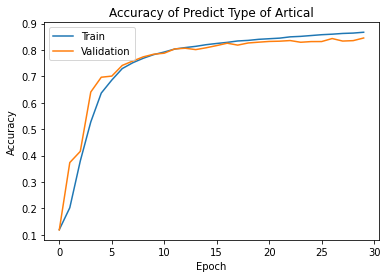

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Predict Type of Artical')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

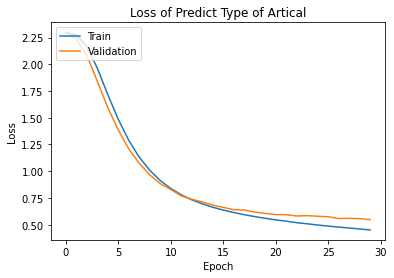

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Predict Type of Artical')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
y_test_plot = np.argmax(y_test, axis=1)

In [ ]:
y_pred = []
for i in X_test:
  y_pred.append(np.argmax(model.predict(i.reshape(-1,max_num))))

y_pred = np.array(y_pred)
print(y_pred)

[2 5 7 ... 2 5 0]


In [ ]:
import pickle
yplot_file = open("/content/drive/MyDrive/Text_classification/Code_Built_Model/y_test_plot.pkl", "wb")
pickle.dump(y_pred, yplot_file)
yplot_file.close()

In [ ]:
import pickle
dictfile = open("/content/drive/MyDrive/Text_classification/Code_Built_Model/y_test_plot.pkl",'rb')
y_pred = pickle.load(dictfile)
dictfile.close()

In [ ]:
pred = X_train[52400].reshape(-1,max_num)
model.predict(pred)

array([[5.8764942e-02, 2.0142757e-06, 8.4945053e-04, 7.8529310e-06,
        9.3490991e-05, 9.3994147e-01, 1.8135346e-05, 4.8143542e-05,
        2.3499106e-04, 3.9529576e-05]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_plot, y_pred)

print(cf_matrix)

[[ 962   39   53   27   59  104   15   24   13   25]
 [  13 1172    9   14   24    7    2   14    4   13]
 [  34   35  920   62   17   23   42   17   19  110]
 [  13   53   75  900   15    3   57   31   11   14]
 [  34   63   14    8 1110   21    3   39    8    3]
 [  47   16   24    1   28 1094    5   11   16    9]
 [  10   11   45   54    6    6 1107   12    5    7]
 [  17   25   25   31   29   13   14 1024    8   19]
 [   5    9   14    2    0    9    4   10 1155   12]
 [   8   14   65   14    1    6    6   17    5 1148]]


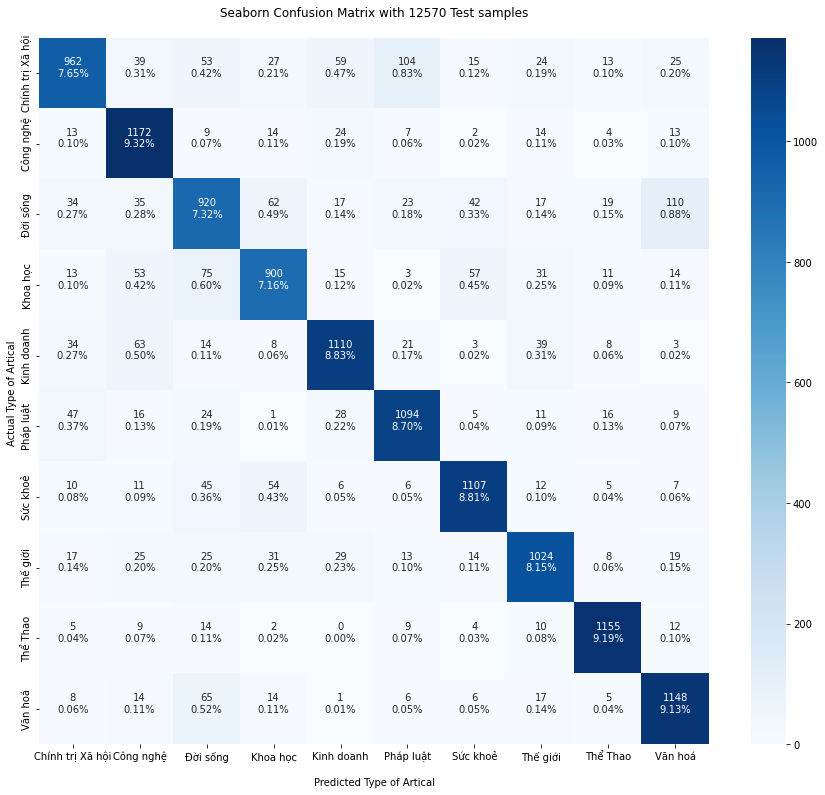

In [ ]:
import seaborn as sns
plt.subplots(figsize = (15,13))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(10,10)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with ' + str(len(X_test)) + ' Test samples\n');
ax.set_xlabel('\nPredicted Type of Artical')
ax.set_ylabel('Actual Type of Artical ');

ax.xaxis.set_ticklabels(['Chính trị Xã hội','Công nghệ','Đời sống','Khoa học','Kinh doanh','Pháp luật','Sức khoẻ','Thế giới','Thể Thao','Văn hoá'])
ax.yaxis.set_ticklabels(['Chính trị Xã hội','Công nghệ','Đời sống','Khoa học','Kinh doanh','Pháp luật','Sức khoẻ','Thế giới','Thể Thao','Văn hoá'])

plt.show()

In [ ]:
#Chinh_tri_Xa_hoi: 0
#Cong_Nghe: 1
#Doi_song: 2
#Khoa_hoc: 3
#Kinh_doanh: 4
#Phap_luat: 5
#Suc_khoe:6
#The_gioi: 7
#The_thao: 8
#Van_hoa: 9 (phim anh, âm nhac, giai tri)
names=['Chính trị Xã hội','Công nghệ','Đời sống','Khoa học','Kinh doanh','Pháp luật','Sức khoẻ','Thế giới','Thể Thao','Văn hoá']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_plot,y_pred,target_names=names))

                  precision    recall  f1-score   support

Chính trị Xã hội       0.84      0.73      0.78      1321
       Công nghệ       0.82      0.92      0.87      1272
        Đời sống       0.74      0.72      0.73      1279
        Khoa học       0.81      0.77      0.79      1172
      Kinh doanh       0.86      0.85      0.86      1303
       Pháp luật       0.85      0.87      0.86      1251
        Sức khoẻ       0.88      0.88      0.88      1263
        Thế giới       0.85      0.85      0.85      1205
        Thể Thao       0.93      0.95      0.94      1220
         Văn hoá       0.84      0.89      0.87      1284

        accuracy                           0.84     12570
       macro avg       0.84      0.84      0.84     12570
    weighted avg       0.84      0.84      0.84     12570



In [ ]:
test = "FIFA từ ngày 1/7 sẽ cấm trường hợp như thủ môn Australia Andrew Redmayne nhảy khiêu khích tiền đạo Peru ở loạt đá luân lưu vớt World Cup 2022"
test = xuly(test).split()
pred = []
pred.append([word_dict[word] for word in test if word in word_dict])
pred = sequence.pad_sequences(pred, max_num)
pred_text = names[np.argmax(model.predict(pred))]
print(pred_text)

Thể Thao


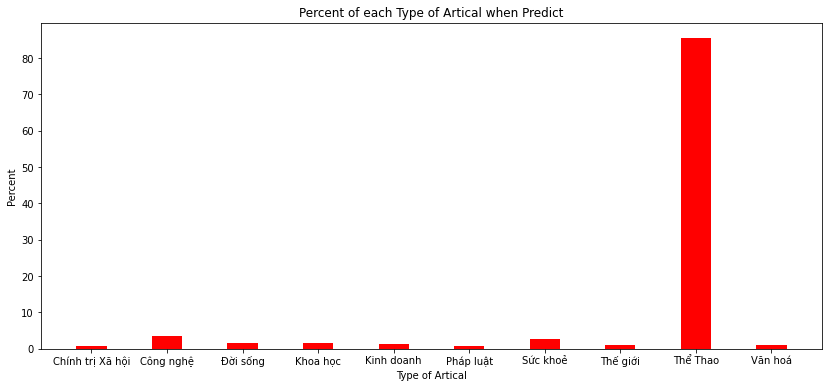

In [ ]:
plt.subplots(figsize = (14,6))
pred_plot = model.predict(pred)
pred_plot = pred_plot.reshape(-1,)*100
plt.bar(names,pred_plot,color='red',width = 0.4)
plt.title('Percent of each Type of Artical when Predict')
plt.ylabel('Percent')
plt.xlabel('Type of Artical')
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://vnexpress.net/cuoc-chien-chong-lam-phat-o-cac-nuoc-giau-4476731.html')
res = str(res.text)
soup = BeautifulSoup(res,"html.parser")
title = soup.title.get_text()
content = soup.meta['content']
text = title + ' ' + content
text = xuly(text).split()
pred = []
pred.append([word_dict[word] for word in text if word in word_dict])
pred = sequence.pad_sequences(pred, max_num)
names[np.argmax(model.predict(pred))]

'Kinh doanh'

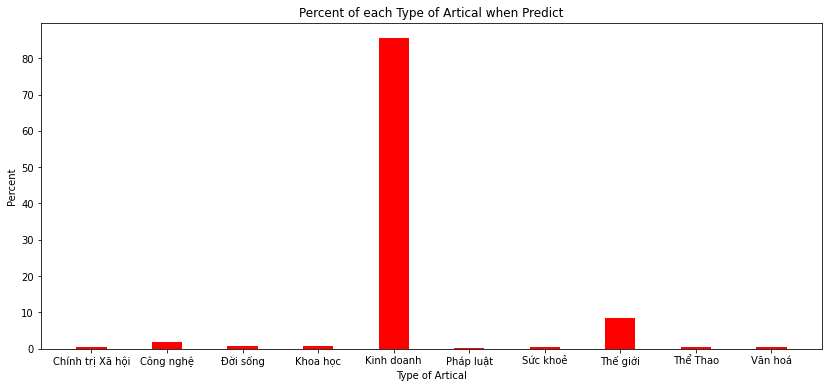

In [ ]:
plt.subplots(figsize = (14,6))
pred_plot = model.predict(pred)
pred_plot = pred_plot.reshape(-1,)*100
plt.bar(names,pred_plot,color='red',width = 0.4)
plt.title('Percent of each Type of Artical when Predict')
plt.ylabel('Percent')
plt.xlabel('Type of Artical')
plt.show()